Keşifsel Veri Analizi - Student Performance Dataset

In [79]:
# 1. Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafikler daha büyük gözüksün
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')

In [80]:
# 2. Veri Yükleme
data = pd.read_csv('dataset/Student performance in mathematics.csv')

In [81]:
# 3. Genel Veri İncelemesi
print("🔍 Veri Şekli:", data.shape)
display(data.head())

print("\n🧠 Veri Tipleri:\n")
print(data.dtypes)

🔍 Veri Şekli: (207, 9)


,condaStudent ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74
1,2,Female,Group C,Some college,No,NaN,69,90,88
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
3,4,Male,Group A,Associate's degree,Yes,NaN,47,57,44
4,5,Male,Group C,Some college,Yes,NaN,76,78,75



🧠 Veri Tipleri:

condaStudent ID                 int64
Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object


In [82]:
# 4. Eksik Değer Analizi
print("\n❓ Eksik Değer Kontrolü:\n")
print(data.isnull().sum())


❓ Eksik Değer Kontrolü:

condaStudent ID                  0
Gender                           0
Race/ethnicity                   0
Parental level of education      0
Lunch                            0
Test preparation course        112
Math score                       0
Reading score                    0
Writing score                    0
dtype: int64


In [83]:
# 5. Temel İstatistikler (Sayısal Veriler)
print("\n📊 Sayısal Değişkenlerin İstatistik Özeti:\n")
display(data.describe())


📊 Sayısal Değişkenlerin İstatistik Özeti:



,condaStudent ID,Math score,Reading score,Writing score
count,207.000000,207.000000,207.000000,207.000000
mean,104.000000,69.207729,69.898551,68.971014
std,59.899917,13.528838,14.960607,15.843259
min,1.000000,38.000000,38.000000,35.000000
25%,52.500000,59.500000,59.000000,57.000000
50%,104.000000,69.000000,70.000000,70.000000
75%,155.500000,79.000000,80.000000,80.000000
max,207.000000,98.000000,100.000000,100.000000


In [84]:
# 6. Kategorik Değişkenlerin Benzersiz Sınıfları
print("\n🎯 Kategorik Değişkenlerin Sınıfları:\n")
categorical_cols = ['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch', 'Test preparation course']
for col in categorical_cols:
    print(f"- {col}: {data[col].unique()}")


🎯 Kategorik Değişkenlerin Sınıfları:

- Gender: ['Female' 'Male']
- Race/ethnicity: ['Group B' 'Group C' 'Group A' 'Group D' 'Group E']
- Parental level of education: ["Bachelor's degree" 'Some college' "Master's degree" "Associate's degree"
 'High school' 'Some high school']
- Lunch: ['Yes' 'No']
- Test preparation course: ['Completed' nan]


In [85]:
# 7. Label Oluşturma
data['average_score'] = (data['Math score'] + data['Reading score'] + data['Writing score']) / 3

def assign_label(avg):
    if avg < 60:
        return 0  # Başarısız
    elif avg < 80:
        return 1  # Orta Seviye
    else:
        return 2  # Başarılı

data['label'] = data['average_score'].apply(assign_label)


🏷️ Label Sınıflarının Dağılımı:

label
1    101
0     54
2     52
Name: count, dtype: int64


/tmp/ipykernel_8928/1093973558.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


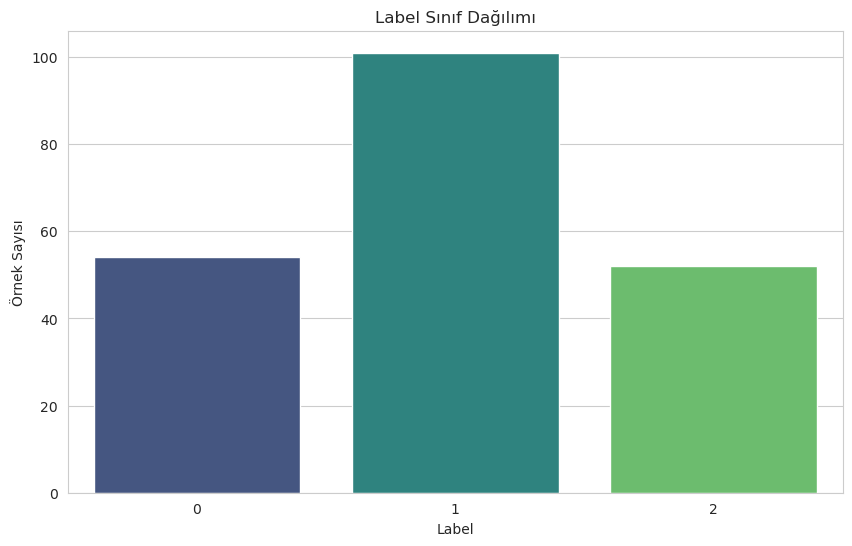

In [86]:
# 8. Hedef Değişken (Label) Dağılımı
print("\n🏷️ Label Sınıflarının Dağılımı:\n")
print(data['label'].value_counts())

sns.countplot(x='label', data=data, palette='viridis')
plt.title('Label Sınıf Dağılımı')
plt.xlabel('Label')
plt.ylabel('Örnek Sayısı')
plt.show()


/tmp/ipykernel_8928/3416977918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


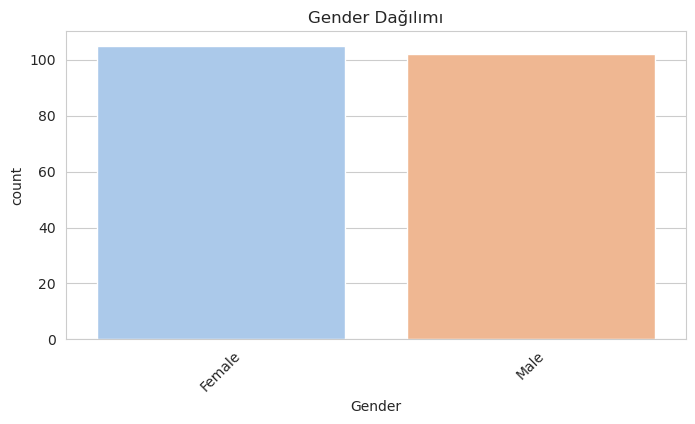

/tmp/ipykernel_8928/3416977918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


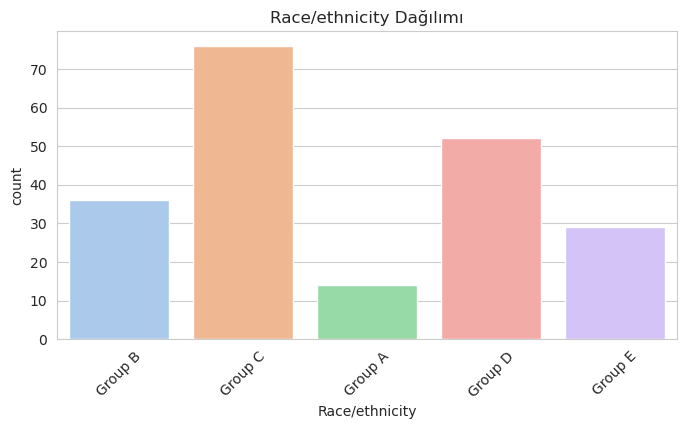

/tmp/ipykernel_8928/3416977918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


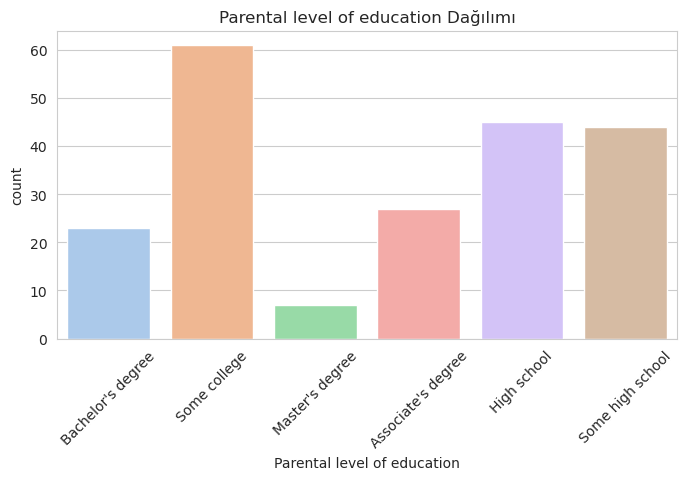

/tmp/ipykernel_8928/3416977918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


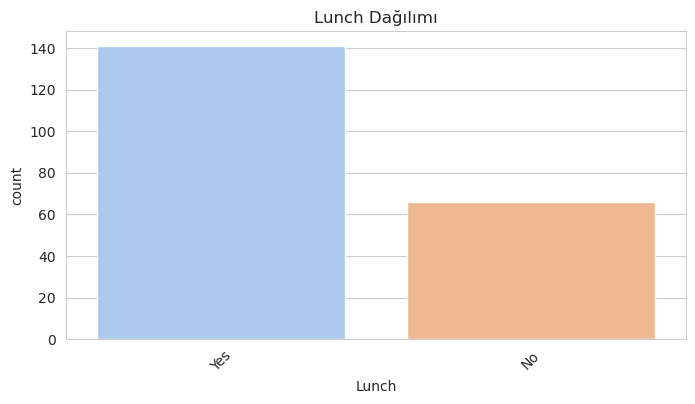

/tmp/ipykernel_8928/3416977918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


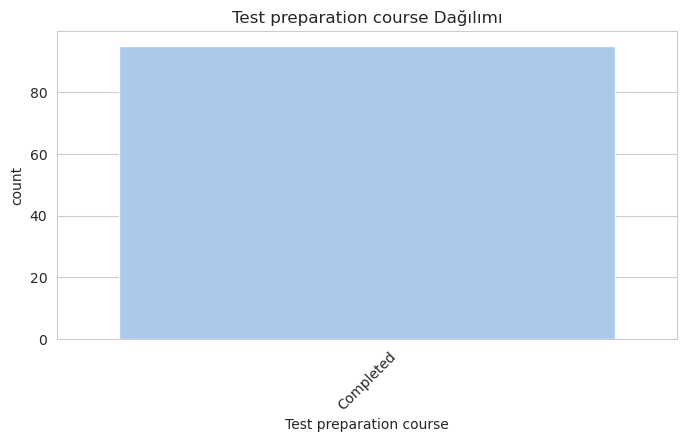

In [87]:
# 9. Kategorik Değişken Dağılımları
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f'{col} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

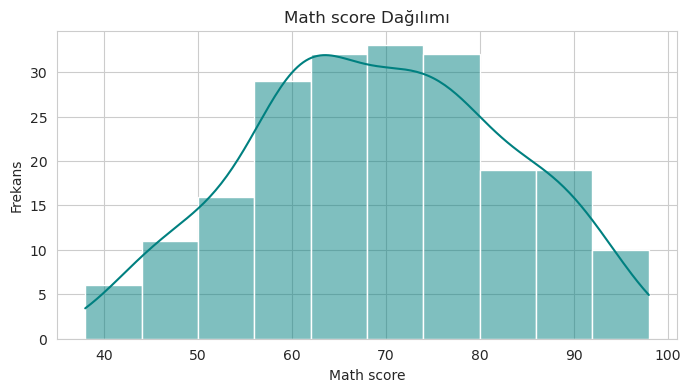

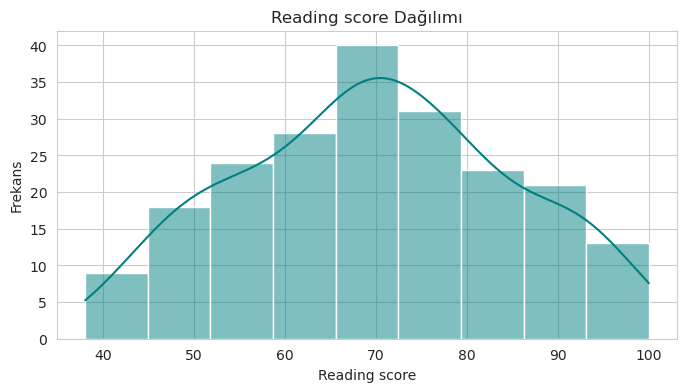

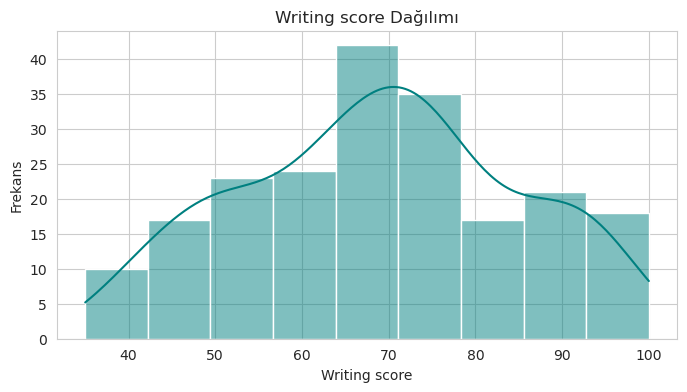

In [88]:
# 10. Sayısal Değişken Dağılımları
numeric_cols = ['Math score', 'Reading score', 'Writing score']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, color='teal')
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()

/home/furkanblt/miniconda3/envs/BTK-Manisa/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


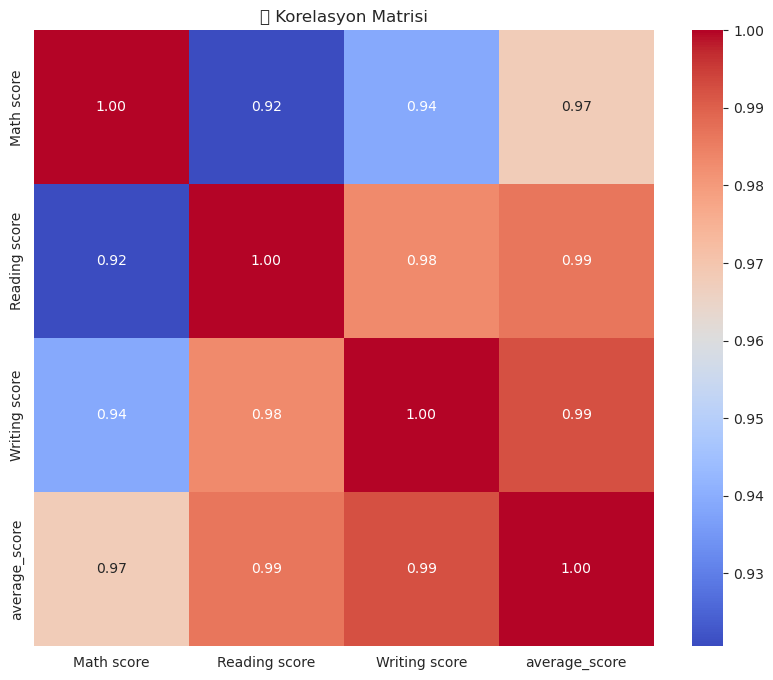

In [89]:
# 11. Korelasyon Analizi
plt.figure(figsize=(10,8))
corr = data[numeric_cols + ['average_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📈 Korelasyon Matrisi')
plt.show()

In [90]:
# 11. Student ID gibi anlam ifade etmeyen sütunları atıyoruz
data = data.drop(columns=['condaStudent ID'])

In [91]:
# 12. Verinin Son Hali
print("\n📦 Veri Setinin Son Hali:\n")
display(data.head())


📦 Veri Setinin Son Hali:



,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,average_score,label
0,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74,72.666667,1
1,Female,Group C,Some college,No,NaN,69,90,88,82.333333,2
2,Female,Group B,Master's degree,No,Completed,90,95,93,92.666667,2
3,Male,Group A,Associate's degree,Yes,NaN,47,57,44,49.333333,0
4,Male,Group C,Some college,Yes,NaN,76,78,75,76.333333,1
